In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import string
import itertools

In [2]:
data=pd.read_csv("EXP0003.TXT", sep="\t", index_col=[0], header=None)

In [3]:
data

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,,,,,,,,,,,,,,,,,,,,,
Time[s],0.0000,1380.0000,2760.0000,4140.0000,5520.0000,6900.0000,8280.0000,9660.0000,11040.0000,12420.0000,...,124200.0000,125580.0000,126960.0000,128340.0000,129720.0000,131100.0000,132480.0000,133860.0000,135240.0000,136620.0000
A1,0.1365,0.1432,0.1474,0.1511,0.1553,0.1591,0.1653,0.1685,0.1748,0.1847,...,0.2582,0.2588,0.2593,0.2596,0.2602,0.2605,0.2614,0.2621,0.2624,0.2627
B1,0.1329,0.1379,0.1423,0.1452,0.1496,0.1536,0.1647,0.1661,0.1678,0.1727,...,0.2700,0.2701,0.2698,0.2720,0.2724,0.2731,0.2741,0.2745,0.2747,0.2760
C1,0.1319,0.1363,0.1413,0.1449,0.1489,0.1525,0.1590,0.1575,0.1614,0.1668,...,0.2706,0.2720,0.2727,0.2755,0.2769,0.2788,0.2809,0.2824,0.2829,0.2850
D1,0.1681,0.1780,0.1835,0.1841,0.1866,0.1892,0.1925,0.1956,0.2102,0.2082,...,0.3360,0.3365,0.3365,0.3369,0.3375,0.3377,0.3380,0.3384,0.3380,0.3387
E1,0.1826,0.1849,0.1864,0.1870,0.1910,0.1930,0.1949,0.1976,0.2006,0.2072,...,0.3895,0.3893,0.3893,0.3893,0.3891,0.3887,0.3884,0.3887,0.3880,0.3881
F1,0.1739,0.1788,0.1822,0.1839,0.1873,0.1898,0.1915,0.1947,0.2020,0.2017,...,0.4136,0.4135,0.4123,0.4128,0.4129,0.4140,0.4124,0.4134,0.4126,0.4120
G1,0.1964,0.1966,0.1986,0.2012,0.2036,0.2059,0.2080,0.2112,0.2197,0.2142,...,0.3444,0.3445,0.3438,0.3439,0.3435,0.3438,0.3427,0.3432,0.3430,0.3424
H1,0.0793,0.0793,0.0786,0.0786,0.0778,0.0791,0.0786,0.0776,0.0793,0.0784,...,0.0788,0.0788,0.0788,0.0791,0.0791,0.0792,0.0790,0.0791,0.0789,0.0789


In [4]:
series = []
for x in range(1,11):
    series.append([string.ascii_uppercase[0]+str(x), string.ascii_uppercase[1]+str(x), string.ascii_uppercase[2]+str(x)])

In [5]:
strains=["-W, G","-M, G","-P, G","-I, G","-W, R","-M, R","-P, R","-I, R","Pa, G","Pa, R"]

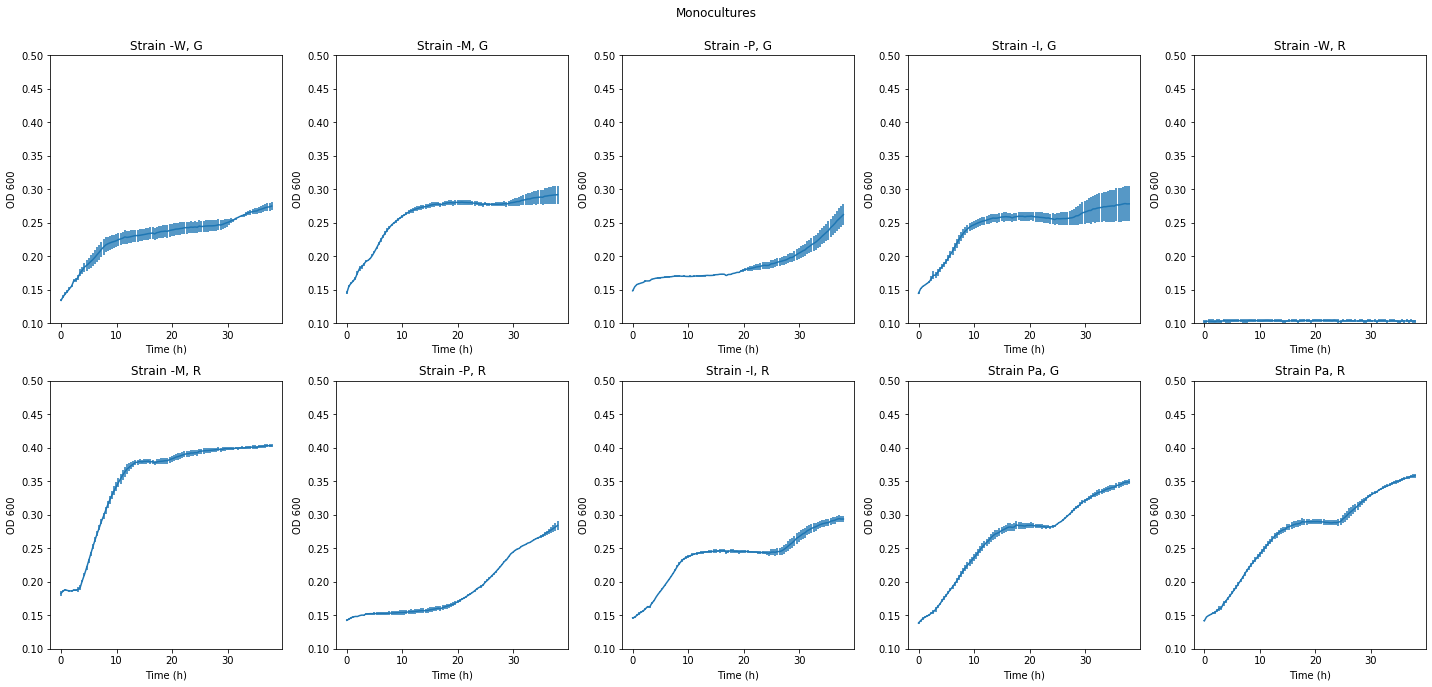

In [11]:
fig = plt.figure(figsize=(20,10))
for x in range(len(series)):
    ax = fig.add_subplot(2, 5, x+1)
    plt.errorbar(data.loc["Time[s]"]/3600,data.loc[series[x]].mean(),yerr=data.loc[series[x]].std()/np.sqrt(3))
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.title("Strain "+strains[x])
    ax.set_ylabel('OD 600')
    ax.set_xlabel('Time (h)') 
    plt.ylim((0.1,0.5))
    
plt.suptitle('Monocultures')
plt.show()

In [7]:
series_2=[]
for z in range(4):
    y=0
    for x in range(4):
        series_2.append([string.ascii_uppercase[z+3]+str(y+1), string.ascii_uppercase[z+3]+str(y+2), string.ascii_uppercase[z+3]+str(y+3)])
        y=y+3


In [12]:
a = [1, 2, 3, 4]
b = [5, 6, 7, 8]
c=list(itertools.product(b,a))

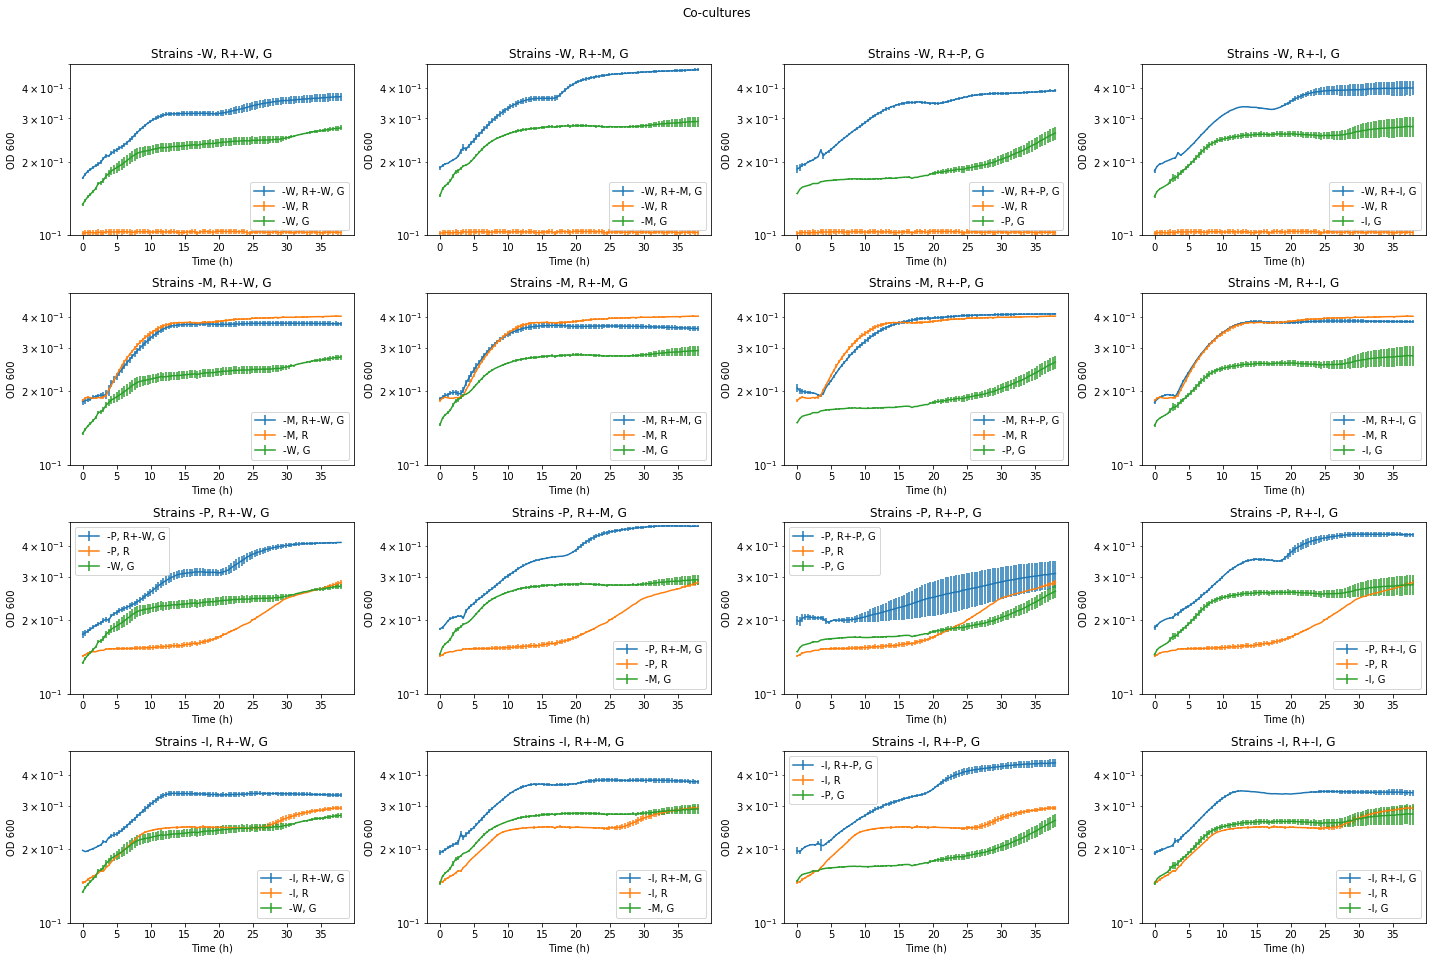

In [18]:
fig2 = plt.figure(figsize=(20,14))
for x in range(len(series_2)):
    ax = fig2.add_subplot(4, 4, x+1)
    
    plt.errorbar(data.loc["Time[s]"]/3600,data.loc[series_2[x]].mean(),yerr=data.loc[series_2[x]].std()/np.sqrt(3))
    plt.errorbar(data.loc["Time[s]"]/3600,data.loc[series[c[x][0]-1]].mean(),yerr=data.loc[series[c[x][0]-1]].std()/np.sqrt(3))
    plt.errorbar(data.loc["Time[s]"]/3600,data.loc[series[c[x][1]-1]].mean(),yerr=data.loc[series[c[x][1]-1]].std()/np.sqrt(3))
    
    plt.legend([str(strains[c[x][0]-1]+"+"+strains[c[x][1]-1]), strains[c[x][0]-1], strains[c[x][1]-1]])
    fig2.tight_layout(rect=[0, 0.03, 1, 0.95])
    ax.set_ylabel('OD 600')
    ax.set_xlabel('Time (h)') 
    plt.ylim((0.1,0.5))
    ax.set_yscale('log')
    plt.title("Strains "+strains[c[x][0]-1]+"+"+strains[c[x][1]-1])

plt.suptitle('Co-cultures')
plt.show()

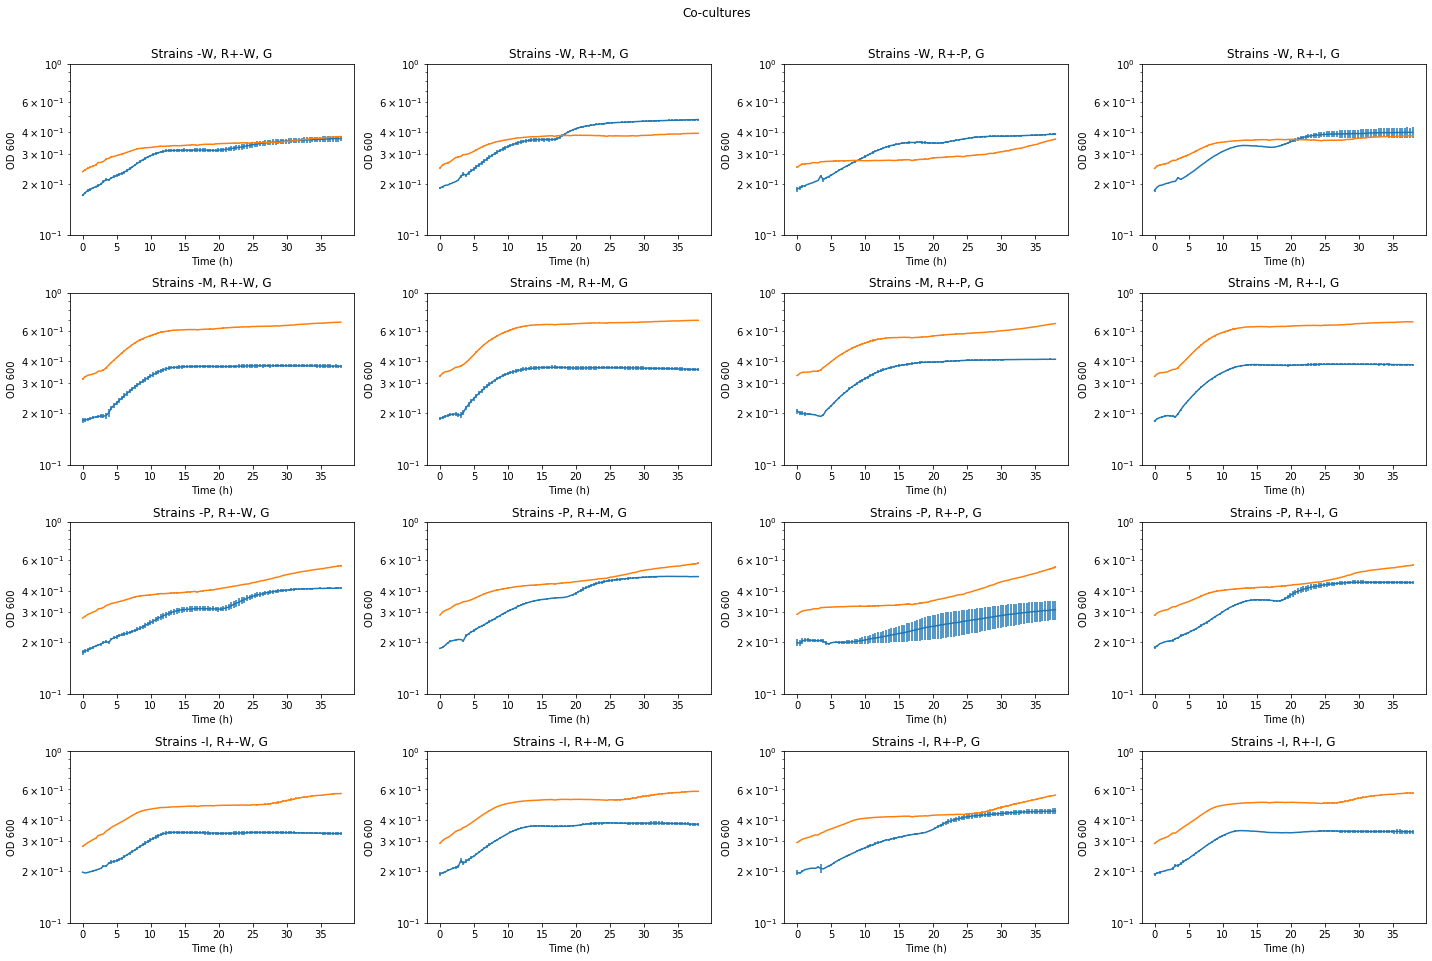

In [22]:
fig2 = plt.figure(figsize=(20,14))
for x in range(len(series_2)):
    ax = fig2.add_subplot(4, 4, x+1)
    
    plt.errorbar(data.loc["Time[s]"]/3600,data.loc[series_2[x]].mean(),yerr=data.loc[series_2[x]].std()/np.sqrt(3))
    plt.errorbar(data.loc["Time[s]"]/3600,data.loc[series[c[x][0]-1]].mean() + data.loc[series[c[x][1]-1]].mean(),yerr=data.loc[series[c[x][0]-1]].std()/np.sqrt(3))
    
    fig2.tight_layout(rect=[0, 0.03, 1, 0.95])
    ax.set_ylabel('OD 600')
    ax.set_xlabel('Time (h)') 
    plt.ylim((0.1,1))
    ax.set_yscale('log')
    plt.title("Strains "+strains[c[x][0]-1]+"+"+strains[c[x][1]-1])

plt.suptitle('Co-cultures')
plt.show()